<a href="https://colab.research.google.com/github/Sanidhyar10/Intro-to-Data-Science-using-python-/blob/main/data_prepration_phase_IT2K21_56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4: Data Preparation Phase To Model The Data

In [ ]:
# Import the following packages:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
# Read in the bank_additional data set and name it bank.
bank = pd.read_csv("/content/bank.csv")

# 4.1 How to partition the Data in Python


In [ ]:
# To partition the data set, we will use the command train_test_split().

bank_train, bank_test = train_test_split(bank, test_size =0.25, random_state = 7)
# The command creates two data sets, bank_train and bank_test. While the names of the data sets are arbitrary, the test data set is always the second one created.
# The first input, bank, specifies that we are partitioning the bank data set,
# and the test_size = 0.25 input states that 25% of the bank data set should be in the test dataset, while the remaining 75% should be in the training data set.
# The random_state input sets the seed for the random number generator that will randomly split the data into training and test data sets. The input value itself is arbitrary.
# The important thing is to specify the seed and use that same number when you want to replicate your results.
# Setting the random seed will ensure you will get the same answer as before.
# To confirm that the data set was partitioned correctly, you can compare the shapes of the original, training, and test data sets using the shape feature.
print(bank.shape)
print(bank_train.shape)
print(bank_test.shape)
# The first numbers given from the bank_train.shape and bank_test.shape
# output should sum to the first number of the bank.shape output.
# Additionally, the first number from the bank_test.shape output should be about 25% of the first number from the bank.shape output.

(11162, 17)
(8371, 17)
(2791, 17)


# 4.2 How to Balance the Training Data Set in Python

In [ ]:
# First, we identify how many records in bank_train have the less common value, “yes,” for deposit, using the value_counts() command.
print(bank_train['deposit'].value_counts())
# The count of “yes” deposits will change depending on the partition.
# For the partition using the random seed specified in the previous Python code, there are 8371 records in the training data set, with 3971 having the “yes” response value.
# Thus, about 47.4% of the training data set has a “yes” response value.
# Say, we want to increase the percentage of “yes” responses to 50%.
#  Since we have p = 0.5, records = 8371, and rare =  3971,
# we obtain x =(p (records)- rare)/(1-p) = 429
# That is, we need to resample 429 records whose deposit is “yes” and add them to our training data set.
# To begin resampling, we isolate the records which we want to resample.
to_resample = bank_train.loc[bank_train['deposit'] == "yes"]

# The loc command subsets the bank_train data based on the condition bank_ train[‘deposit’] == “yes” and saves the resulting data set under the name to_resample.
# Next, we need to sample from our records of interest
our_resample = to_resample.sample(n = 429, replace = True)

# The sample() command draws records at random from to_resample, which holds the records we want to resample.
# The input n =429 specifies how many records to draw, while the input replace = True specifies to sample with replacement.
# The output is a data set made up of these 429 randomly resampled records, which we save under the name our_resample.
# Finally, we add the resampled records to our original training data set.
bank_train_rebal = pd.concat([bank_train, our_resample])

# The concat() command attaches two data sets by putting the rows on top of each other.
# The result is a single data set made up of the records in both bank_train and our_resample, which is saved as its own data set under the name bank_train_rebal.

# To check that the desired percent of “yes” responses was obtained, examine the table of the response variable.
print(bank_train_rebal['deposit'].value_counts())
# There are now 4400 records out of
# 3930 with a “yes” response, which amounts to about 30%.

no     4400
yes    3971
Name: deposit, dtype: int64
yes    4400
no     4400
Name: deposit, dtype: int64


# 4.3 How to Build CART Decision Trees Using Python

In [ ]:
# Load the required packages and read in the training data set as adult_tr.
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# Load the dataset
adult_tr = pd.read_csv('/content/adult.csv')

# Extract the target variable 'income'
y = adult_tr[['income']]

# Create dummy variables for the 'marital-status' column using get_dummies
marital_dummies = pd.get_dummies(adult_tr['marital-status'], prefix='marital')

# Concatenate the dummy variables with other features
X = pd.concat([adult_tr[['capital-gain']], marital_dummies], axis=1)

# Continue with the rest of your code
cart01 = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=5).fit(X, y)
export_graphviz(cart01, out_file="/content/sample_data/cart01.dot", feature_names=X.columns, class_names=y['income'].unique())
predIncomeCART = cart01.predict(X)
import graphviz

source = graphviz.Source.from_file("/content/sample_data/cart01.dot", format="png")
source.render("/content/sample_data/cart01")
source.view()

'/content/sample_data/cart01.png'

#4.4 How to Build C5.0 Decision Trees Using Python

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Assuming you have already loaded your dataset 'adult_tr'
# Extract the target variable 'income'
y = adult_tr['income']

# Create dummy variables for the 'marital-status' column
marital_dummies = pd.get_dummies(adult_tr['marital-status'], prefix='marital')

# Concatenate the dummy variables with other features
X = pd.concat([adult_tr[['capital-gain']], marital_dummies], axis=1)

# Define feature names
X_names = ["capital-gain"] + list(marital_dummies.columns)

# Define target variable names
y_names = y.unique()

# Build the decision tree using entropy as the criterion
c50_01 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5).fit(X, y)

# Export the decision tree to a DOT file
export_graphviz(c50_01, out_file="c50_01.dot", feature_names=X_names, class_names=y_names, filled=True, rounded=True)

# Visualize the decision tree (optional)
source = graphviz.Source.from_file("c50_01.dot", format="png")
source.render("c50_01", view=True)

# Obtain the classifications for each record in the training data set
predictions = c50_01.predict(X)
print(predictions)


['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '>50K']



# 4.5 How to Build Random Forests Python

['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '>50K']


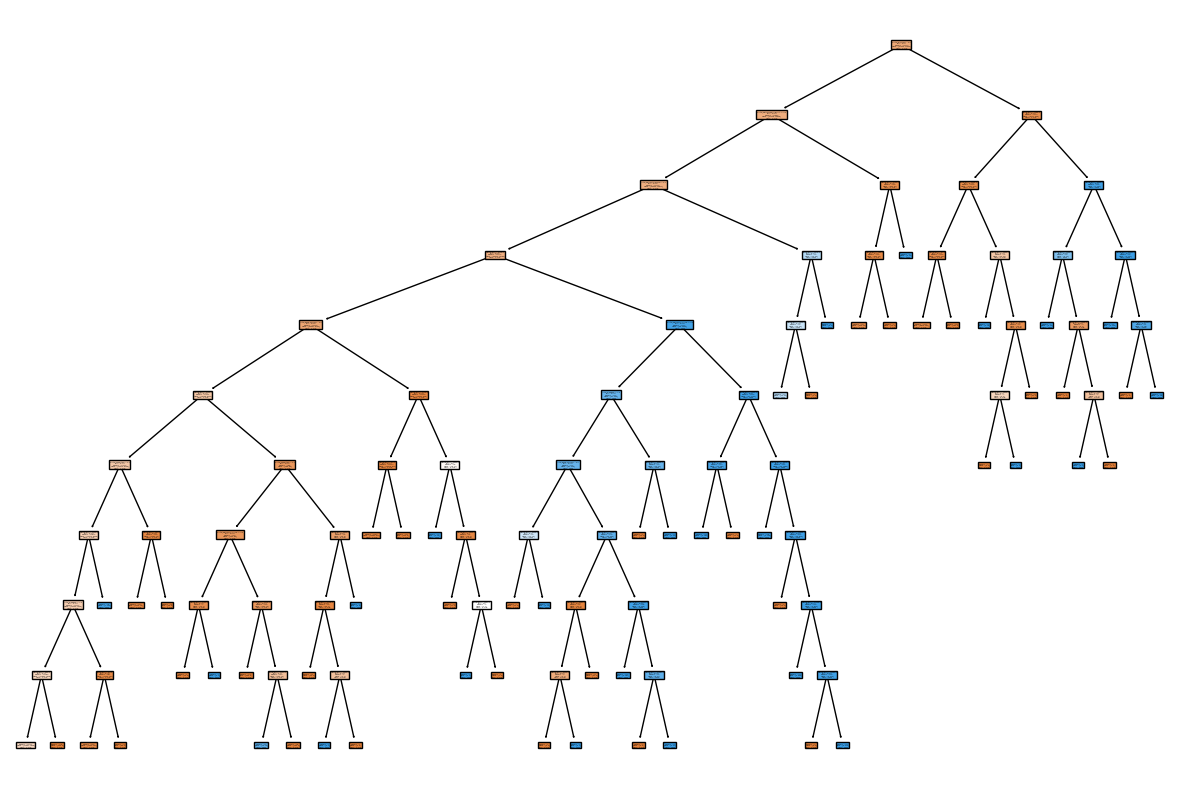

In [ ]:
# Assuming you have already loaded your dataset 'adult_tr'

# Extract the target variable 'income'
y = adult_tr['income']

# Create dummy variables for the 'marital-status' column
marital_dummies = pd.get_dummies(adult_tr['marital-status'], prefix='marital')

# Concatenate the dummy variables with other features
X = pd.concat([adult_tr[['capital-gain']], marital_dummies], axis=1)

# Flatten the target variable into a one-dimensional array
rfy = np.ravel(y)

# Load the required libraries
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier
rf01 = RandomForestClassifier(n_estimators=100, criterion="gini").fit(X, rfy)

# View the classifications made on the training data set by the random forest algorithm
predictions_rf = rf01.predict(X)
print(predictions_rf)
# To visualize the decision trees within the random forest, you can use the plot_tree function from scikit-learn or export each tree individually.
# Here's an example using the plot_tree function:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first decision tree in the random forest
plt.figure(figsize=(15, 10))
plot_tree(rf01.estimators_[0], feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()